### Gregory Sembiring Brahmana - 13317001
### Bernardus Rendy - 13317041
### Nicholas Biantoro - 13317043
### Murphy Halim - 13317069

# Klasifikasi Pada Dataset "Iris"
Akan dilakukan analisis klasifikasi pada dataset "Iris" (Dataset iris adalah dataset dari sns yang diadakan untuk eksperimen metode machine learning)

## Visualisasi Data
Pertama dilakukan visualisasi dan pengecekkan pada dataset untuk mendapatkan insight mengenai dataset dan perlakuan data preprocessing

In [1]:
# Import modul yang digunakan
import seaborn as sns; sns.set(style="ticks", color_codes=True) # Modul untuk plot
import pandas as pd # Modul untuk mengolah dataset dalam dataframe
from sklearn.linear_model import LogisticRegression #Modul untuk Logistic Regression
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset "Iris" pada variable df
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
    code_species_map = dict(zip(
    range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
    for c in ds['target']]
    return df
df = get_iris_df()

In [3]:
# Lihat 5 data paling atas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Lihat statistik deskriptif data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Lihat info datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Terlihat data sudah bersih, tidak ada NaN untuk seluruh data karena 150 entries dan 150 non-null 

## Pairplot
Selanjutnya dilakukan pairplot untuk melihat sebaran data untuk tiap feature

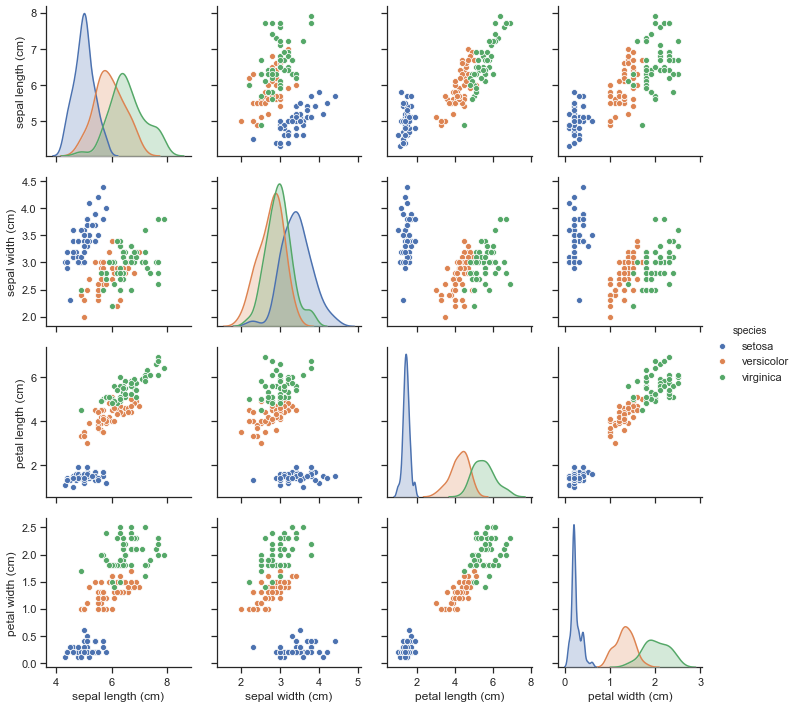

In [6]:
# Lihat gambaran data dengan plot, dipisahkan oleh warna berdasarkan spesies
sns.pairplot(df, hue='species')

## Perbandingan Classifier Logistic Regression Berdasarkan Variasi Jumlah Feature dan Jenis Feature Input
Berdasarkan visualisasi data dari grafik, terlihat bahwa terdapat feature dengan irisan antar data yang minimal dan mudah dipisahkan dengan linear, adalah:
1. petal_length dan petal_width (Classifier1)

Dua feature dengan irisan antar data yang maksimal dan non linear, adalah:
2. sepal_length dan sepal_width (Classifier2)

Kemudian juga digunakan perbandingan dengan input empat feature:
3. petal_length, petal_width, sepal_length, sepal_width (Classifier3)

Lalu digunakan Multi Layer Perceptron Classifier untuk ketiga variasi tersebut (Classifier4,5,6)

In [7]:
# Input dan Output Variable
x=df[['petal length (cm)','petal width (cm)','sepal length (cm)', 'sepal width (cm)']].values
y=df['species'].values
np.random.seed(1)
# Train-Test Split untuk Mengurangi Overfitting dan Pengujian yang Tidak Bias
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x1_train=x_train[:,[0,1]]
x2_train=x_train[:,[2,3]]
x1_test=x_test[:,[0,1]]
x2_test=x_test[:,[2,3]]

In [8]:
# Membuat model Logistic Regression
classifier1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x1_train, y_train)
classifier2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x2_train, y_train)
classifier3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x_train,y_train) 
#perubahan max_iter menjadi 200 karena untuk max_iter=100, program belum konvergen

In [9]:
classifier1.score(x1_test, y_test)

0.9666666666666667

In [10]:
classifier2.score(x2_test, y_test)

0.8

In [11]:
classifier3.score(x_test,y_test)

0.9666666666666667

### Kesimpulan
1. Terlihat lebih akurat kombinasi feature petal_length dan petal_width karena covariant yang lebih tinggi dan secara visual, data lebih tercluster
2. Terlihat hasil 4 Feature selalu lebih akurat atau sama dengan 2 Feature (Classifier1) karena pada Classifier1, feature yang digunakan adalah feature yang memiliki clustering antar data yang paling baik, dan pada Classifier2, feature juga tercluster tapi tidak sebaik feature pada Classifier1

# Pembuatan Classifier Multi Layer Perceptron
#### Dibuat MLP classifier dengan input 4 feature untuk membandingkan kinerja dengan logistic regression (Classifier4)

In [12]:
from sklearn.neural_network import MLPClassifier
X = x_train
Y = y_train
classifier4 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(11, 4), random_state=1, max_iter=99999)
classifier4.fit(X,Y)

MLPClassifier(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(11, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=99999, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
classifier4.score(x_test,y_test)

1.0

#### Dibuat MLP classifier dengan input 2 feature untuk membandingkan efek feature input (Classifier5)

In [14]:
x1_train=x_train[:,[0,1]]
x1_test=x_test[:,[0,1]]
classifier5 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(14, 4), random_state=1, max_iter=99999)
classifier5.fit(x1_train,y_train)

MLPClassifier(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=99999, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
classifier5.score(x1_test,y_test)

0.9666666666666667

In [16]:
x2_train=x_train[:,[2,3]]
x2_test=x_test[:,[2,3]]
classifier6 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(17, 4), random_state=1, max_iter=99999)
classifier6.fit(x2_train,y_train)

MLPClassifier(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(17, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=99999, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
classifier6.score(x2_test,y_test)

0.8666666666666667

### Kesimpulan
1. Diperoleh hasil yang mirip dengan logistic regression dengan 4 feature

## Classifier Evaluation
Akan dianalisis performa dari classifier dengan menggunakan metode sebagai berikut
1. Confusion Matrices
2. ROC Curves

### Confusion Matrix
Confusion Matrix adalah tabel yang mendeskripsikan performa suatu classification model. Variabel yang digunakan untuk mengukur performa confusion matrix ada empat, yakni True Positif, False Positif, True Negatif, 
dan False Negatif. 

True Positif (TP) menunjukkan jumlah data input yang menghasilkan output positif pada suatu kelas dengan benar setelah melewati classifier machine learning.
False Positif (FP) menunjukkan jumlah data input yang menghasilkan output positif pada suatu kelas tapi salah setelah melewati classifier machine learning.
False Negatif (FN) menunjukkan jumlah data input yang menghasilkan output negatif pada suatu kelas tapi salah setelah melewati classifier machine learning.

Parameter yang dihitung pada confusion matrix ada 3 yakni, precision, recall, dan fi-score.

Precision Menunjukkan keakuratan mdoel untuk mendeteksi nilai output yang benar
$$ Precision = \frac{TP}{TP+FP}$$

Recall mengukur sebaik apa model dalam mendeteksi positive events
$$ Recall = \frac{TP}{TP+FN}$$

Fi-score digunakan untuk mengukur kesetimbangan antara Precision dengan Recall
$$ Fi-score = \frac{2*TP}{2*TP+FP+FN} $$

### Referensi :
https://www.researchgate.net/post/Can_someone_help_me_to_calculate_accuracy_sensitivity_of_a_66_confusion_matrix
https://towardsdatascience.com/confusion-matrix-and-class-statistics-68b79f4f510b

In [18]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

### Logistic Regression 2 Feature Optimal

In [19]:
actual = y_test
predicted = classifier1.predict(x1_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy Score :
0.9666666666666667
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Logistic Regression 2 Feature Tidak Optimal

In [20]:
actual = y_test
predicted = classifier2.predict(x2_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[11  0  0]
 [ 1  8  4]
 [ 0  1  5]]
Accuracy Score :
0.8
Report : 
              precision    recall  f1-score   support

      setosa       0.92      1.00      0.96        11
  versicolor       0.89      0.62      0.73        13
   virginica       0.56      0.83      0.67         6

    accuracy                           0.80        30
   macro avg       0.79      0.82      0.78        30
weighted avg       0.83      0.80      0.80        30



### Logistic Regression 4 Feature

In [21]:
actual = y_test
predicted = classifier3.predict(x_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy Score :
0.9666666666666667
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### MLP Classifier 4 Feature

In [22]:
actual = y_test
predicted = classifier4.predict(x_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score :
1.0
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### MLP Classifier 2 Feature Optimal

In [23]:
actual = y_test
predicted = classifier5.predict(x1_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy Score :
0.9666666666666667
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### MLP Classifier 2 Feature Tidak Optimal

In [24]:
actual = y_test
predicted = classifier6.predict(x2_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
Accuracy Score :
0.8666666666666667
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.69      0.82        13
   virginica       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30



## Kesimpulan Hasil Analisa menggunakan Confusion Matrix
Classifier diurutkan dari performa yang terbaik:
1. Multi Layer Perceptron Classifier dengan 4 fitur
2. Logistic Regression dengan fitur petal length dan petal width, Logistic Regression dengan 4 fitur (Performa sama), MLP Classifier dengan fitur petal length dan petal width
3. Logistic Regression dengan fitur sepal length dan sepal width, MLP Classifier 2 fitur sepal length dan sepal width

urutan tersebut dilihat dari nilai precision, recall yang paling besar

### ROC Multiclass

Selanjutnya dilakukan analisis ROC untuk multiclass dengan menggunakan OneVsRestClassifier dan library roc_curve serta auc
pada:
1. Logistic Regression 2 Feature Optimal (Classifier1)
2. Logistic Regression 2 Feature Tidak Optimal (Classifier2)
3. Logistic Regression 4 Feature (Classifier3)
4. Multi Layer Perceptron 4 Feature (Classifier4)

Pada Analisis ROC, diberikan noise pada input untuk penentuan model yang dapat tahan dalam uji True Positive Rate dan False Positive Rate dengan noise. Karena data merupakan multiclass, hasil ROC akan dibuat menjadi macro-average

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
y = label_binarize(y, classes=['setosa', 'versicolor', 'virginica'])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

#### Logistic Regression 2 Feature (petal_width and petal_length)

In [26]:
x1_train=x_train[:,[0,1]]
x1_test=x_test[:,[0,1]]
# Learn to predict each class against the other
classifier = OneVsRestClassifier(classifier1)
y_score = classifier.fit(x1_train, y_train).predict_proba(x1_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr_classifier1=fpr
tpr_classifier1=tpr
roc_auc_classifier1=roc_auc

#### Logistic Regression 2 Feature (sepal_length and sepal_width)

In [27]:
x2_train=x_train[:,[2,3]]
x2_test=x_test[:,[2,3]]
# Learn to predict each class against the other
classifier = OneVsRestClassifier(classifier2)
y_score = classifier.fit(x2_train, y_train).predict_proba(x2_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr_classifier2=fpr
tpr_classifier2=tpr
roc_auc_classifier2=roc_auc

#### Logistic Regression 4 Feature

In [28]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(classifier3)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr_classifier3=fpr
tpr_classifier3=tpr
roc_auc_classifier3=roc_auc

#### MLP Classifier 4 Feature

In [29]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(classifier4)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr_classifier4=fpr
tpr_classifier4=tpr
roc_auc_classifier4=roc_auc

#### MLP Classifier 2 Feature Optimal

In [30]:
x1_train=x_train[:,[0,1]]
x1_test=x_test[:,[0,1]]

# Learn to predict each class against the other
classifier5= MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(14, 4), random_state=1, max_iter=99999)
classifier = OneVsRestClassifier(classifier5)
y_score = classifier.fit(x1_train, y_train).predict_proba(x1_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr_classifier5=fpr
tpr_classifier5=tpr
roc_auc_classifier5=roc_auc

#### MLP Classifier 2 Feature Tidak Optimal

In [31]:
x2_train=x_train[:,[2,3]]
x2_test=x_test[:,[2,3]]

# Learn to predict each class against the other
classifier6= MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(17, 4), random_state=1, max_iter=99999)
classifier = OneVsRestClassifier(classifier6)
y_score = classifier.fit(x2_train, y_train).predict_proba(x2_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr_classifier6=fpr
tpr_classifier6=tpr
roc_auc_classifier6=roc_auc

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


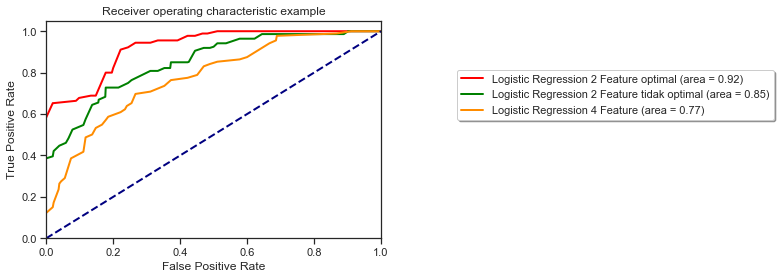

In [32]:
plt.figure()
lw = 2
plt.plot(fpr_classifier1["macro"], tpr_classifier1["macro"], color='red',
         lw=lw, label='Logistic Regression 2 Feature optimal (area = %0.2f)' % roc_auc_classifier1["macro"])
plt.plot(fpr_classifier2["macro"], tpr_classifier2["macro"], color='green',
         lw=lw, label='Logistic Regression 2 Feature tidak optimal (area = %0.2f)' % roc_auc_classifier2["macro"])
plt.plot(fpr_classifier3["macro"], tpr_classifier3["macro"], color='darkorange',
         lw=lw, label='Logistic Regression 4 Feature (area = %0.2f)' % roc_auc_classifier3["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
ax = plt.subplot(111)
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.7, 0.8), shadow=True, ncol=1)
plt.show()

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


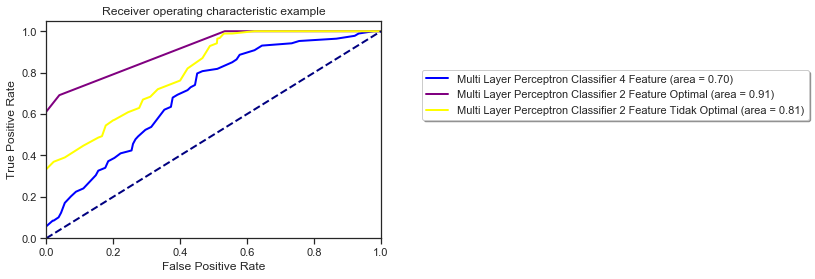

In [33]:
plt.plot(fpr_classifier4["macro"], tpr_classifier4["macro"], color='blue',
         lw=lw, label='Multi Layer Perceptron Classifier 4 Feature (area = %0.2f)' % roc_auc_classifier4["macro"])
plt.plot(fpr_classifier5["macro"], tpr_classifier5["macro"], color='purple',
         lw=lw, label='Multi Layer Perceptron Classifier 2 Feature Optimal (area = %0.2f)' % roc_auc_classifier5["macro"])
plt.plot(fpr_classifier6["macro"], tpr_classifier6["macro"], color='yellow',
         lw=lw, label='Multi Layer Perceptron Classifier 2 Feature Tidak Optimal (area = %0.2f)' % roc_auc_classifier6["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
ax = plt.subplot(111)
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.7, 0.8), shadow=True, ncol=1)
plt.show()

### Kesimpulan
Dari hasil ROC ditarik kesimpulan sebagai berikut
1. Logistic Regression dengan 2 feature optimal dan MLP Classifier dengan 2 feature optimal memiliki akurasi dan ketahanan terhadap gangguan (noise) yang lebih baik daripada yang lain
2. MLP Classifier dengan 4 feature dan akurasi maksimal tidak dapat bertahan terhadap noise pada data karena MLP membutuhkan data yang bagus dan lebih overfitted dibanding yang lain karena jumlah hidden layer yang banyak agar akurat
3. Logistic Regression dengan 2 feature yang tidak optimal memiliki ketahanan terhadap gangguan (noise) yang lebih baik daripada 4 feature, hal ini menunjukkan bahwa semakin banyak feature yang dimiliki, ketahanan terhadap gangguan semakin buruk dan lebih baik membuat classifier dengan feature terbatas tetapi dapat merepresentasikan klasifikasi yang baik dibanding banyak feature tetapi terdapat feature yang tidak diperlukan dan overfitting
4. MLP memiliki karakteristik yang mirip dengan logistic regression karena logistic function merupakan fungsi aktivasi non linear yang umum pada MLP dan digunakan dalam MLP classifier

# Kesimpulan umum
1. Pada dataset Iris, terdapat dua feature yang saling memiliki korelasi secara linear dan dapat dengan mudah dipisahkan secara linear intercept bernama "petal_width" dan "petal_length", feature tersebut paling bagus digunakan untuk classification dibanding 2 feature lainnya, dan semakin sedikit feature yang digunakan, model semakin tahan terhadap noise serta overfitting
2. Model terbaik untuk digunakan pada dataset Iris adalah MLP Classifier dan Logistic Regression dengan menggunakan input dua fitur yaitu petal length dan petal width (Karena memiliki akurasi yang tinggi dan tidak overfitting)
3. Penggunaan model yang telah dilatih terdapat dibawah kesimpulan ini

# Penggunaan

In [34]:
# Input dan Output Variable
x=df[['petal length (cm)','petal width (cm)','sepal length (cm)', 'sepal width (cm)']].values
y=df['species'].values
np.random.seed(1)
# Train-Test Split untuk Mengurangi Overfitting dan Pengujian yang Tidak Bias
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x1_train=x_train[:,[0,1]]
x2_train=x_train[:,[2,3]]
x1_test=x_test[:,[0,1]]
x2_test=x_test[:,[2,3]]

In [35]:
# Membuat model Logistic Regression
classifier1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x1_train, y_train)
classifier2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x2_train, y_train)
classifier3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x_train,y_train) 
#perubahan max_iter menjadi 200 karena untuk max_iter=100, program belum konvergen
# Membuat kembali model MLP Classifier
X = x_train
Y = y_train
classifier4 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(11, 4), random_state=1, max_iter=99999)
classifier4.fit(X,Y)
x1_train=x_train[:,[0,1]]
x1_test=x_test[:,[0,1]]
classifier5 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(14, 4), random_state=1, max_iter=99999)
classifier5.fit(x1_train,y_train)
x2_train=x_train[:,[2,3]]
x2_test=x_test[:,[2,3]]
classifier6 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(17, 4), random_state=1, max_iter=99999)
classifier6.fit(x2_train,y_train)

MLPClassifier(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(17, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=99999, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Dapat digunakan dengan catatan sebagai berikut:
1. classifier1 : Logistic Regression (2 Feature optimal)
2. classifier2 : Logistic Regression (2 Feature non-linear dan sulit)
3. classifier3 : Logistic Regression (4 Feature)
4. classifier4 : MLP Classifier (4 Feature)
5. classifier5 : MLP Classifier (2 Feature optimal)
6. classifier6 : MLP Classifier (2 Feature non-linear dan sulit)
7. classifier7 : Lasso Regression (4 Feature)

# Penggunaan

In [36]:
classifier1.predict(x1_test)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [37]:
classifier2.predict(x2_test)

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

In [38]:
classifier3.predict(x_test)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [39]:
classifier4.predict(x_test)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [40]:
classifier5.predict(x1_test)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [41]:
classifier6.predict(x2_test)

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica'],
      dtype='<U10')

# Plotting Decision Boundary

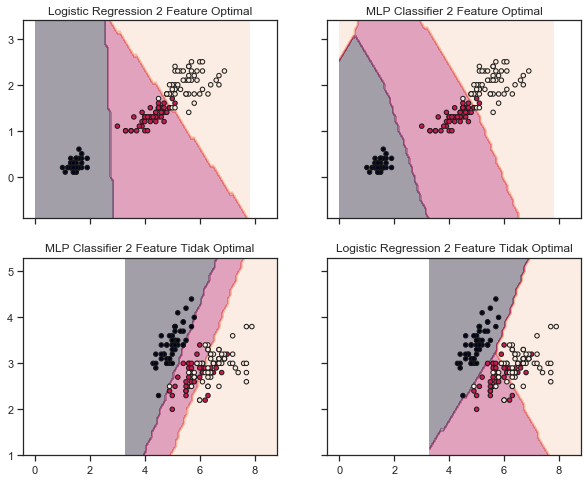

In [42]:
from itertools import product
# Plotting decision regions
# untuk Fitur Optimal
x=df[['petal length (cm)','petal width (cm)','sepal length (cm)', 'sepal width (cm)']].values
y=df['species'].values
for i in range (y.shape[0]):
    if y[i]=='setosa':
        y[i]=0
    elif y[i]=='versicolor':
        y[i]=1
    elif y[i]=='virginica':
        y[i]=2
x1=x[:,[0,1]]
x2=x[:,[2,3]]
x_min, x_max = x1[:,0].min() - 1, x1[:,0].max() + 1
y_min, y_max = x1[:, 1].min()-1, x1[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0,1],[0, 1]),
                        [classifier1, classifier5],
                        ['Logistic Regression 2 Feature Optimal','MLP Classifier 2 Feature Optimal']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    for i in range (Z.shape[0]):
        for j in range (Z.shape[1]):
            if Z[i][j]=='setosa':
                Z[i][j]=0
            elif Z[i][j]=='versicolor':
                Z[i][j]=1
            elif Z[i][j]=='virginica':
                Z[i][j]=2

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x1[:, 0], x1[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

# Untuk Fitur tidak optimal
x_min, x_max = x2[:,0].min() - 1, x2[:,0].max() + 1
y_min, y_max = x2[:, 1].min()-1, x2[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for idx, clf, tt in zip(product([1,0],[1,0]),
                        [classifier2, classifier6],
                        ['Logistic Regression 2 Feature Tidak Optimal','MLP Classifier 2 Feature Tidak Optimal']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    for i in range (Z.shape[0]):
        for j in range (Z.shape[1]):
            if Z[i][j]=='setosa':
                Z[i][j]=0
            elif Z[i][j]=='versicolor':
                Z[i][j]=1
            elif Z[i][j]=='virginica':
                Z[i][j]=2

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x2[:, 0], x2[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

    

In [43]:
print("Pembahasan dan Kesimpulan Terdapat Pada Comment Code")

Pembahasan dan Kesimpulan Terdapat Pada Comment Code
